In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [66]:
df = pd.read_csv('fatal-police-shootings-data.csv')

Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [148]:
df['race'].fillna('unknown', inplace=True)
mental_illness = df.pivot_table(values='name', index='race', columns='signs_of_mental_illness', aggfunc=(len),fill_value=0, margins=True)
mental_illness

signs_of_mental_illness,False,True,All
race,,,
A,69,24,93
B,1114,184,1298
H,745,157,902
N,64,14,78
O,37,11,48
W,1763,713,2476
unknown,408,113,521
All,4200,1216,5416


In [146]:
# def mental_illness_percent(row):
#     percent = (row['True']/row['All'])*100
#     return percent

# mental_illness['mental_illness_percent'] = mental_illness.apply(lambda row: mental_illness_percent(row), axis=1)

In [69]:
df['date'] = pd.to_datetime(df['date'])
df['week_day'] = df['date'].dt.day_name()
df['week_day']

0         Friday
1         Friday
2       Saturday
3         Sunday
4         Sunday
          ...   
5411    Saturday
5412    Saturday
5413      Monday
5414     Tuesday
5415     Tuesday
Name: week_day, Length: 5416, dtype: object

In [70]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
intervention_day = df.groupby('week_day')['date'].count().reindex(days)
intervention_day

week_day
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: date, dtype: int64

<AxesSubplot:xlabel='week_day'>

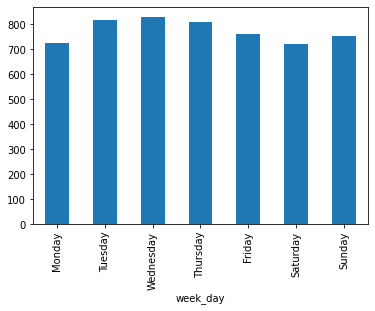

In [71]:
intervention_day.plot.bar(x='week_day', y=None)

In [124]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data[0]
states_by_population = data[0]

population_of_state = pd.DataFrame({'State':states_by_population['State'], 'Population': states_by_population['Population estimate, July 1, 2019[2]']})
population_of_state.drop(population_of_state.index[[56,57,58,59]], inplace=True)
#population_of_state

In [131]:
data2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
data2[0]
abbreviations = data2[0]

abbreviations.columns = range(abbreviations.columns.size)

shortcuts = pd.DataFrame({'State':abbreviations[0], 'Codes':abbreviations[3]})
shortcuts.dropna(axis='index', inplace=True)
#shortcuts

In [107]:
add_population_shortcuts = pd.merge(population_of_state, shortcuts, how='inner', on='State')
#add_population_shortcuts

In [127]:
incident_state = df.groupby('state')['id'].count() # obliczam ile było interwencji w poszczególnych stanach

interventions = incident_state.to_frame(name='Incicents') # konwertuję na DataFrame

interventions.reset_index(inplace=True) # restartuję indeks

interventions.rename(columns={'state':'Codes'}, inplace=True) # muszę zmienić nazwę kolumny ponieważ w poprzednich tabelach 'state' jest nazwą stanu a nie kodem

#interventions

In [136]:
full_table = pd.merge(interventions, add_population_shortcuts, how='inner', on='Codes')
#full_table

In [135]:
def per_1000(row):
    ip_1000 = row['Incicents']/(row['Population']/1000)
    return ip_1000

full_table['Per_1000'] = full_table.apply(lambda row: per_1000(row), axis=1)

full_table

,Codes,Incicents,State,Population,Per_1000
0,AK,39,Alaska,731545,0.053312
1,AL,104,Alabama,4903185,0.021211
2,AR,83,Arkansas,3017825,0.027503
3,AZ,254,Arizona,7278717,0.034896
4,CA,799,California,39512223,0.020222
5,CO,195,Colorado,5758736,0.033862
6,CT,21,Connecticut,3565287,0.005890
7,DC,13,District of Columbia,705749,0.018420
8,DE,13,Delaware,973764,0.013350
9,FL,350,Florida,19453561,0.017992
